# **Project Name**    - Amazon Prime EDA

##### **Project Type**    - EDA
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Nafis Ansari

# **Project Summary -**

The current competitive streaming platforms like Amazon Prime are expanding their content libraries to attract diverse audiences. Due to an increasing numbeer of TV shows and movies, data-driven insights are required to understand trends, audience preferences and content strategy. 

# **GitHub Link -**

https://github.com/NafisAnsari786

# **Problem Statement**


**An exploratory data analysis is performed on the Amazon Prime data, that is available as 2 separate csv files to find interesting facts.**

#### **Define Your Business Objective?**

1. Analyze watch time and engagement trends to improve recommendations.
2. Analyze genre popularity to optimize content production and licensing.
3. Understand user demographics and behavior to optimize subscription plans.
4. Analyze viewing patterns to improve personalization algorithms.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

### Dataset Loading

In [2]:
# Load Dataset
amazon_title = pd.read_csv('titles.csv')
amazon_credits = pd.read_csv('credits.csv')

### Dataset First View

In [3]:
# Dataset First Look
amazon_title.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,NaN,96,"['western', 'drama']",['US'],NaN,tt0031971,7.8,48149.0,11.786,7.7
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,444243.0,26.495,8.3
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['comedy', 'romance', 'drama']",['US'],NaN,tt0028010,8.0,23532.0,8.633,7.6
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6


In [4]:
amazon_credits.head(10)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
5,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
6,28715,tm19248,Jim Farley,General Thatcher,ACTOR
7,27348,tm19248,Frederick Vroom,A Southern General,ACTOR
8,28716,tm19248,Charles Henry Smith,Annabelle's Father,ACTOR
9,28718,tm19248,Joe Keaton,Union General,ACTOR


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
amazon_title.shape

(9871, 15)

In [6]:
amazon_credits.shape

(124235, 5)

### Dataset Information

In [7]:
# Dataset Info
amazon_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [8]:
amazon_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
amazon_title.duplicated().sum()

3

In [10]:
amazon_credits.duplicated().sum()

56

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
amazon_title.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [12]:
amazon_credits.isna().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

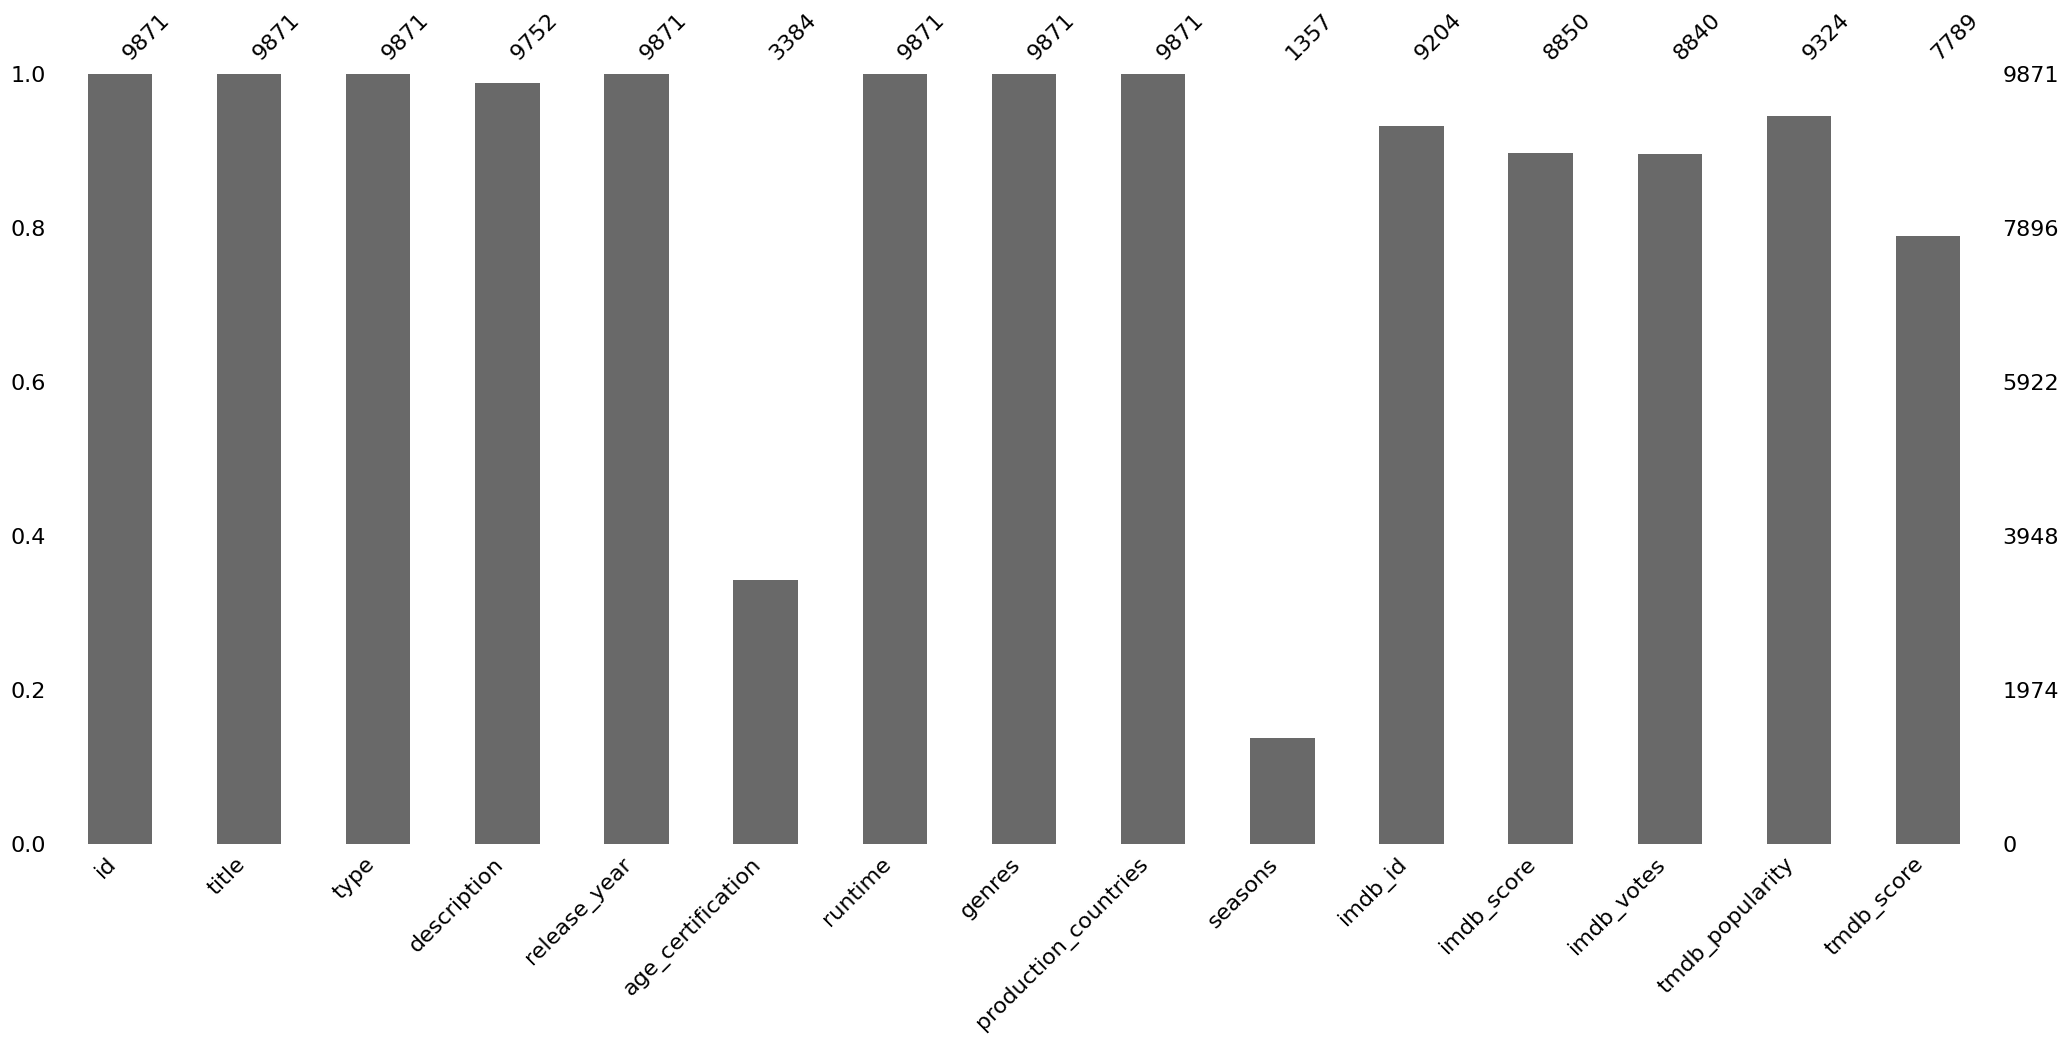

In [13]:
# Visualizing the missing values
import missingno as msno
msno.bar(amazon_title)
plt.show()

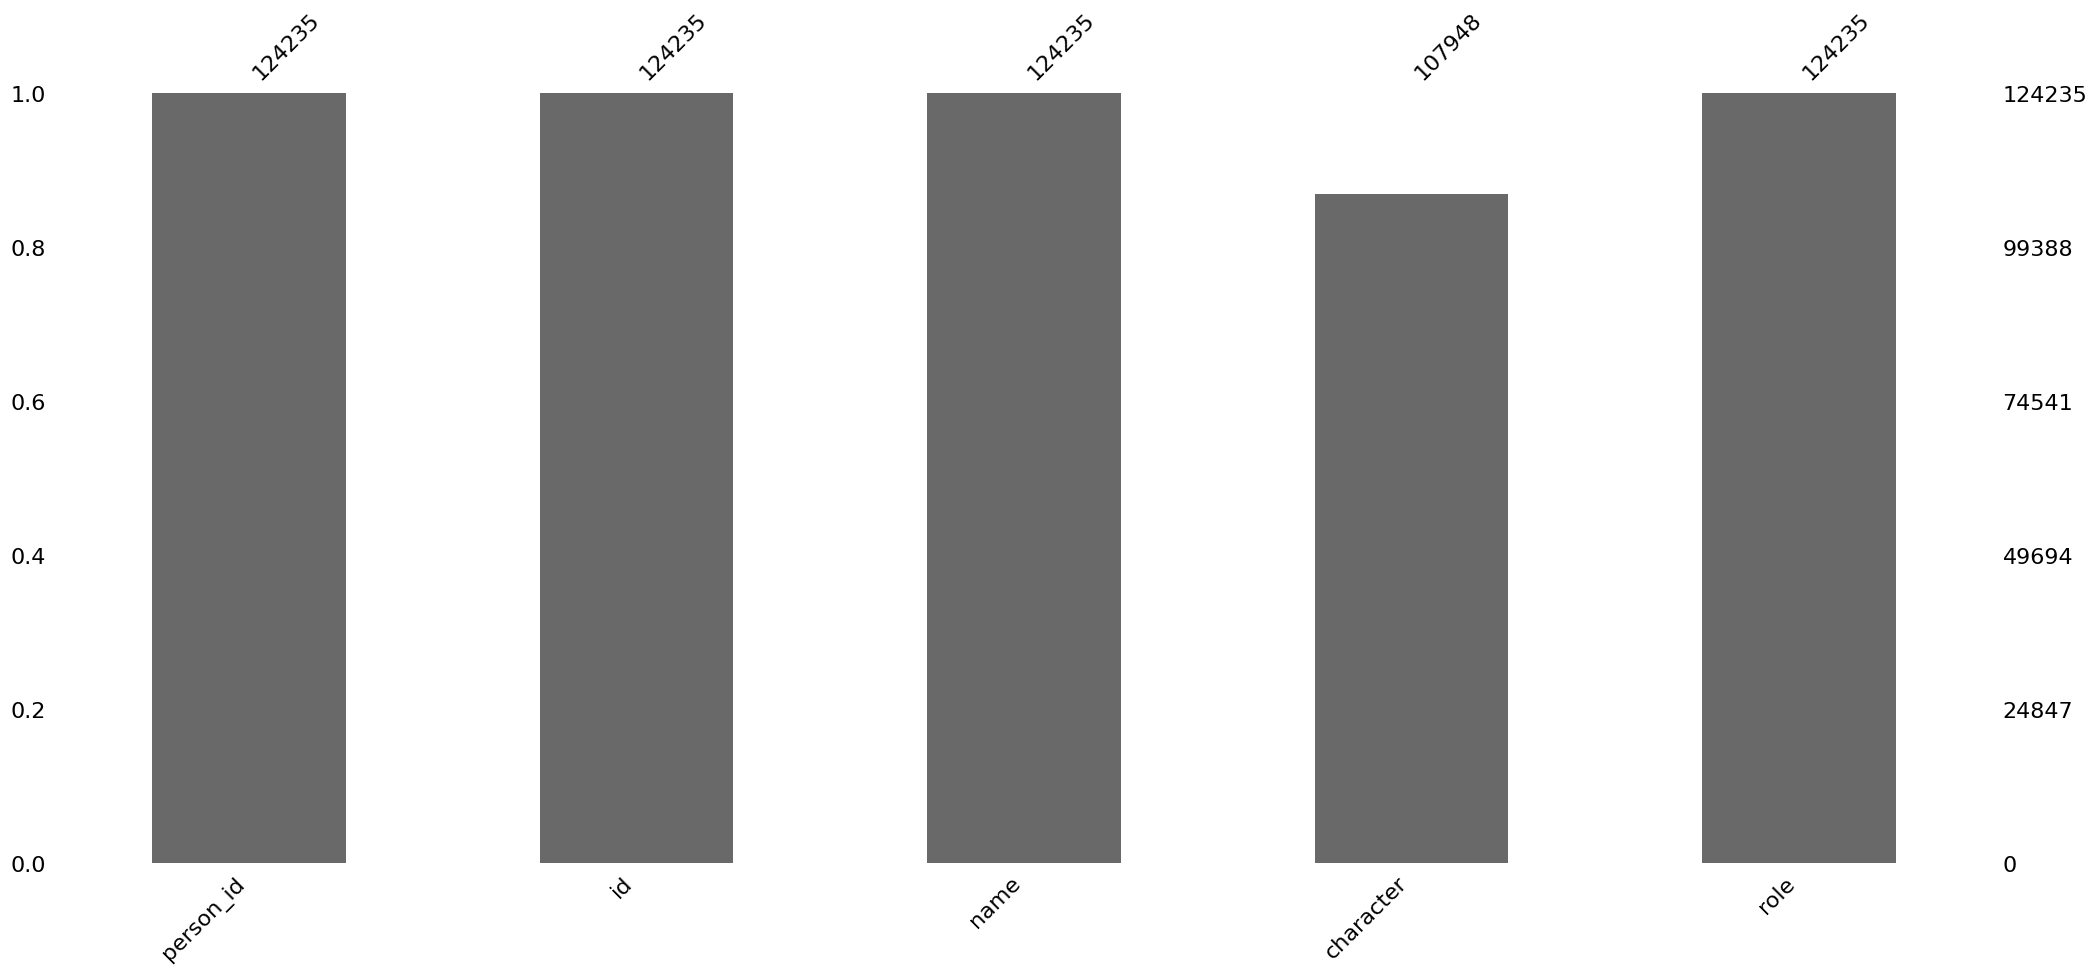

In [14]:
msno.bar(amazon_credits)
plt.show()

### What did you know about your dataset?

**Title dataset**

There are 9871 examples and 15 features in the title dataset. Id, title, type, description, age_certification, genres, porduction_countires and imdb_id are of object datatype whereas the rest are numerical features. 'Seasons' column has the highest number of missing values. 'Age_certification' has the second highest number of missing values. imdb and tmdb scores are missing for nearly 10-20% of the dataset. 'Description' has the least number of missing values. imdb_id, imdb_votes, and tmdb_popularity have missing values too. 

**Credits dataset**

There are 124235 examples and 5 features in this dataset. Except person_id, rest of the features are of object datatype. Only character feature has missing values and there are 16287 missing values.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
amazon_title.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [16]:
amazon_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [17]:
# Dataset Describe
amazon_title.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

**Title dataset**
1. id - Title ID on JustWatch
2. title - Name of the title
3. show_type - TV Show or Movie
4. description - a brief description
5. release_year - release year
6. age_certification - the age certification
7. runtime - length of an episode in show or length of a movie
8. genres - genre of show / movie
9. production_countries - Countries that produced the title
10. seasons - No. of seasons if it's a show
11. imdb_id - The title ID on IMDB
12. imdb_score - IMDB score
13. imdb_votes - Votes on IMDB
14. tmdb_popularity - Popularity on TMDB
15. tmdb_score - Score on TMDB

**Credits dataset**
1. person_ID - The person ID on JustWatch
2. id - title ID on JustWatch
3. Name - Actor / Director's name
4. character_name - The character's name
5. role - Actor / Director

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for x in amazon_title.columns:
    print(f"{x} - {amazon_title[x].nunique()}")

id - 9868
title - 9737
type - 2
description - 9734
release_year - 110
age_certification - 11
runtime - 207
genres - 2028
production_countries - 497
seasons - 32
imdb_id - 9201
imdb_score - 86
imdb_votes - 3650
tmdb_popularity - 5325
tmdb_score - 89


In [19]:
for x in amazon_credits.columns:
    print(f"{x} - {amazon_credits[x].nunique()}")

person_id - 80508
id - 8861
name - 79758
character - 71097
role - 2


In [20]:
amazon_title['type'].value_counts()

type
MOVIE    8514
SHOW     1357
Name: count, dtype: int64

In [21]:
amazon_title['age_certification'].unique()

array(['TV-PG', nan, 'PG', 'G', 'PG-13', 'R', 'TV-G', 'TV-Y', 'TV-14',
       'NC-17', 'TV-Y7', 'TV-MA'], dtype=object)

In [22]:
amazon_title['genres'].unique()

array(["['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']",
       "['action', 'drama', 'war', 'western', 'comedy', 'european']",
       "['romance', 'war', 'drama']", ...,
       "['drama', 'family', 'thriller']",
       "['thriller', 'western', 'comedy']",
       "['comedy', 'action', 'family']"], dtype=object)

In [23]:
amazon_title['production_countries'].unique()

array(["['US']", "['GB']", "['MX', 'US']", "['GB', 'CA']", "['DE', 'US']",
       "['SU']", '[]', "['IN']", "['CA', 'US']", "['MX']", "['XX']",
       "['US', 'IT']", "['JP']", "['IT', 'FR']", "['HK']",
       "['FR', 'DE', 'IT']", "['ES', 'IT']", "['GB', 'US']",
       "['IL', 'US']", "['US', 'FR', 'IT']", "['IT']",
       "['IT', 'GB', 'US']", "['GB', 'US', 'IT', 'MX', 'ES']",
       "['AU', 'US']", "['CH', 'GB']", "['CA', 'FR']", "['US', 'IE']",
       "['GB', 'IT']", "['IT', 'US']", "['FR']", "['GR', 'US']", "['DE']",
       "['HK', 'US', 'CN']", "['US', 'ES']", "['PH', 'US']",
       "['NL', 'US']", "['FR', 'US']", "['IT', 'YU']",
       "['FR', 'DE', 'CH', 'CI']", "['PR', 'US']", "['US', 'PH']",
       "['YU', 'US']", "['IT', 'MX']", "['IT', 'ES', 'DE', 'LI']",
       "['US', 'CA']", "['US', 'GB']", "['US', 'DE']",
       "['US', 'IT', 'FR']", "['CA']", "['FR', 'GB']", "['JP', 'KR']",
       "['GR']", "['ES']", "['US', 'JP']", "['SU', 'US']", "['FR', 'DE']",
       "['FR', 'IT']"

## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.
amazon_title[['type','seasons']][amazon_title.type=='SHOW'].isna().sum()

type       0
seasons    0
dtype: int64

In [25]:
amazon_title[['type','seasons']][amazon_title.type=='MOVIE'].isna().sum()

type          0
seasons    8514
dtype: int64

In [26]:
# As movies have no seasons, fill the null values with 0
amazon_title['seasons'].fillna(value=0,inplace=True)

In [27]:
amazon_title['description'].fillna(value='Not Available',inplace=True)

In [28]:
amazon_title.age_certification.fillna(value='Not Available',inplace=True)

In [29]:
amazon_title.imdb_id.fillna(value='Unavailable',inplace=True)

In [30]:
amazon_title.fillna(0,inplace=True)

In [31]:
amazon_title.drop_duplicates(inplace=True)

In [32]:
amazon_title["genres"] = amazon_title["genres"].apply(ast.literal_eval)
amazon_title["production_countries"] = amazon_title["production_countries"].apply(ast.literal_eval)

In [33]:
amazon_title_up = amazon_title.explode('genres').explode('production_countries').reset_index(drop=True)

In [34]:
amazon_title_up.shape

(25819, 15)

In [35]:
amazon_title_up.fillna(value='Unavailable',inplace=True)

In [36]:
amazon_title_up.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [37]:
amazon_title_up.duplicated().sum()

0

In [38]:
amazon_title_up.production_countries = amazon_title_up.production_countries.replace('United States of America','US')

In [39]:
amazon_title_up.production_countries = amazon_title_up.production_countries.replace('XX','Unavailable')

In [40]:
# Dictionary mapping country codes to country names
country_mapping = {
    'US': 'United States', 'GB': 'United Kingdom', 'MX': 'Mexico', 'CA': 'Canada', 'DE': 'Germany',
    'SU': 'Soviet Union', 'Unavailable': 'Unknown', 'IN': 'India', 'IT': 'Italy',
    'JP': 'Japan', 'FR': 'France', 'HK': 'Hong Kong', 'ES': 'Spain', 'IL': 'Israel', 'AU': 'Australia',
    'CH': 'Switzerland', 'IE': 'Ireland', 'GR': 'Greece', 'CN': 'China', 'PH': 'Philippines', 'NL': 'Netherlands',
    'YU': 'Yugoslavia', 'CI': 'Ivory Coast (Côte d\'Ivoire)', 'PR': 'Puerto Rico', 'LI': 'Liechtenstein',
    'KR': 'South Korea', 'XC': 'Czechoslovakia', 'HU': 'Hungary', 'TW': 'Taiwan', 'AN': 'Netherlands Antilles',
    'MC': 'Monaco', 'CO': 'Colombia', 'RO': 'Romania', 'EG': 'Egypt', 'TR': 'Turkey', 'BE': 'Belgium',
    'ZA': 'South Africa', 'PT': 'Portugal', 'CL': 'Chile', 'SE': 'Sweden', 'BR': 'Brazil', 'DK': 'Denmark',
    'NZ': 'New Zealand', 'RU': 'Russia', 'LU': 'Luxembourg', 'CZ': 'Czech Republic', 'FI': 'Finland',
    'AT': 'Austria', 'SK': 'Slovakia', 'AR': 'Argentina', 'VE': 'Venezuela', 'TH': 'Thailand', 'PL': 'Poland',
    'AE': 'United Arab Emirates', 'SI': 'Slovenia', 'BA': 'Bosnia and Herzegovina', 'ID': 'Indonesia',
    'NO': 'Norway', 'AF': 'Afghanistan', 'IR': 'Iran', 'IS': 'Iceland', 'BG': 'Bulgaria', 'JM': 'Jamaica',
    'RS': 'Serbia', 'SZ': 'Eswatini (Swaziland)', 'LT': 'Lithuania', 'TC': 'Turks and Caicos Islands',
    'SG': 'Singapore', 'UY': 'Uruguay', 'BO': 'Bolivia', 'UA': 'Ukraine', 'MY': 'Malaysia', 'TN': 'Tunisia',
    'QA': 'Qatar', 'NG': 'Nigeria', 'KZ': 'Kazakhstan', 'GQ': 'Equatorial Guinea', 'MT': 'Malta', 'SO': 'Somalia',
    'KE': 'Kenya', 'MA': 'Morocco', 'VN': 'Vietnam', 'BD': 'Bangladesh', 'FJ': 'Fiji', 'MN': 'Mongolia',
    'UG': 'Uganda', 'TT': 'Trinidad and Tobago', 'PK': 'Pakistan', 'XK': 'Kosovo', 'PE': 'Peru', 'DO': 'Dominican Republic',
    'SV': 'El Salvador', 'GE': 'Georgia', 'PS': 'Palestine', 'HR': 'Croatia', 'LV': 'Latvia', 'AQ': 'Antarctica',
    'LB': 'Lebanon', 'KH': 'Cambodia', 'CR': 'Costa Rica', 'BM': 'Bermuda', 'JO': 'Jordan', 'PA': 'Panama',
    'AL': 'Albania', 'CY': 'Cyprus', 'CU': 'Cuba', 'PY': 'Paraguay', 'EE': 'Estonia', 'ET': 'Ethiopia',
    'PF': 'French Polynesia', 'EC': 'Ecuador', 'IO': 'British Indian Ocean Territory', 'AM': 'Armenia',
    'SY': 'Syria', 'CM': 'Cameroon', 'LY': 'Libya'
}
amazon_title_up.production_countries = amazon_title_up.production_countries.replace(country_mapping)

In [41]:
amazon_title_up.production_countries.unique()

array(['United States', 'United Kingdom', 'Mexico', 'Canada', 'Germany',
       'Soviet Union', 'Unknown', 'India', 'Italy', 'Japan', 'France',
       'Hong Kong', 'Spain', 'Israel', 'Australia', 'Switzerland',
       'Ireland', 'Greece', 'China', 'Philippines', 'Netherlands',
       'Yugoslavia', "Ivory Coast (Côte d'Ivoire)", 'Puerto Rico',
       'Liechtenstein', 'South Korea', 'Czechoslovakia', 'Hungary',
       'Taiwan', 'Netherlands Antilles', 'Monaco', 'Colombia', 'Romania',
       'Egypt', 'Turkey', 'Belgium', 'South Africa', 'Portugal', 'Chile',
       'Sweden', 'Brazil', 'Denmark', 'New Zealand', 'Russia',
       'Luxembourg', 'Czech Republic', 'Finland', 'Austria', 'Slovakia',
       'Argentina', 'Venezuela', 'Thailand', 'Poland',
       'United Arab Emirates', 'Slovenia', 'Bosnia and Herzegovina',
       'Indonesia', 'Norway', 'Afghanistan', 'Iran', 'Iceland',
       'Bulgaria', 'Jamaica', 'Serbia', 'Eswatini (Swaziland)',
       'Lithuania', 'Turks and Caicos Islands', 'Si

In [42]:
amazon_credits.fillna(value='Unavailable',inplace=True)

In [43]:
amazon_credits.isna().sum()

person_id    0
id           0
name         0
character    0
role         0
dtype: int64

### What all manipulations have you done and insights you found?

**Title dataset**

Seasons have the highest null values and I observed that the null values are from type 'MOVIE'. As 'MOVIE' doesn't have seasons, the null values for this column are replaces by 0. The null values in age_certification, description and imdb_id are replaced by 'Not Available'. The null values in imdb_scores, imdb_votes, tmdb_popularity and tmdb_scores are replaced by 0. The entries in genres and production_countries are present as a list and I have splitted them into multiple examples with each genre and production_countires containing each element in the list. The modified dataset has 25819 entries and the duplicate entries have been removed.

**Credits dataset**

Only the character column has null values. These are replaced by 'Unavailable'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

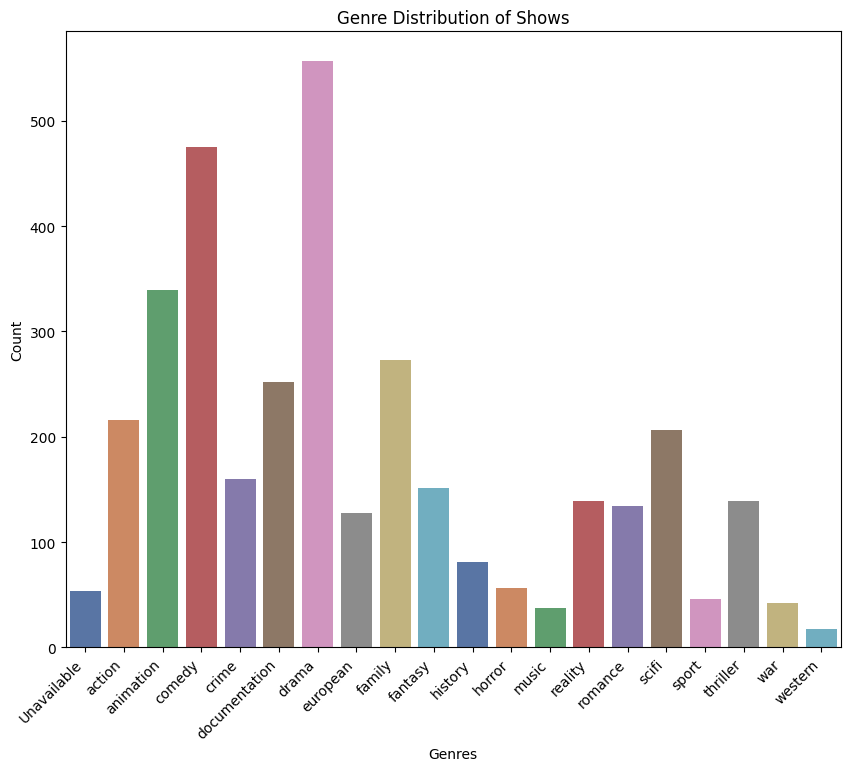

In [44]:
# Chart - 1 visualization code
# Barplot on genres - shows
genre_plot = amazon_title_up[amazon_title_up.type=='SHOW'].groupby('genres')['genres'].count()
genre_pl = pd.DataFrame(genre_plot)
# Rename the count column
genre_pl.rename(columns={'genres': 'count'}, inplace=True)
genre_pl.reset_index(inplace=True)
# Create a bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.barplot(data=genre_pl, x="genres", y="count", hue="genres", palette="deep", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Distribution of Shows")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart is been picked to have an idea about the distribution of genres based on shows present.

##### 2. What is/are the insight(s) found from the chart?

Majority of shows belong to the drama genre, with second highest being comedy. There are more than 300 animated shows. There are more than 200 shows belonging to the genre action, documentation, family and scifi. There are over 100 crime, european, fantasy, reality and romance shows. Rest of the genres have very less count with western being least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Majority of the people in general would prefer drama and comedy, so there would be more subscription count thereby ensuring positive growth.

#### Chart - 2

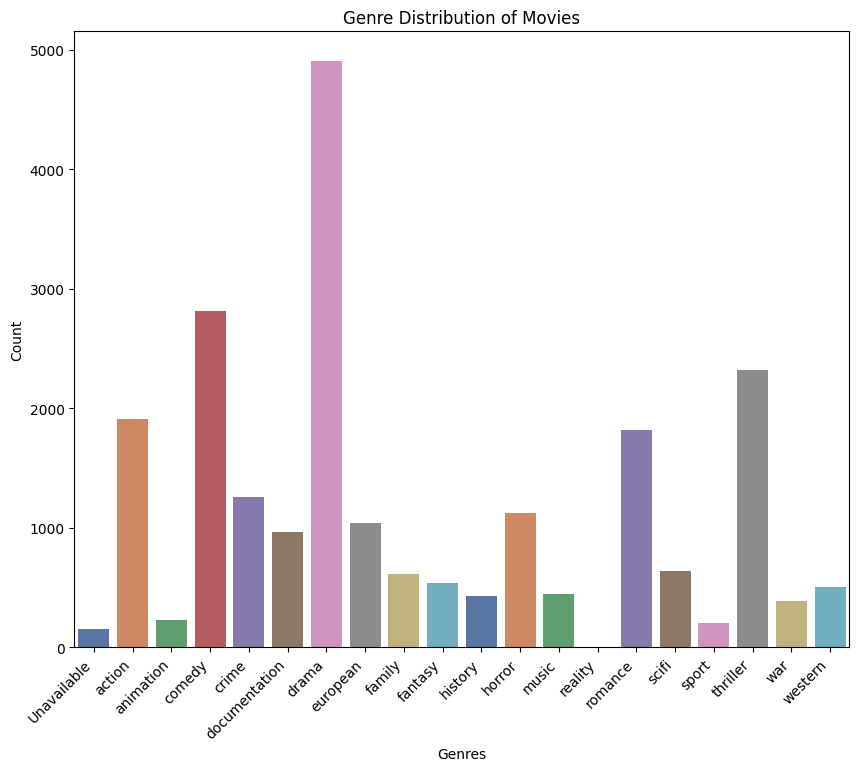

In [45]:
# Chart - 2 visualization code
# Barplot on genres - movies
genre_plot = amazon_title_up[amazon_title_up.type=='MOVIE'].groupby('genres')['genres'].count()
genre_pl = pd.DataFrame(genre_plot)
# Rename the count column
genre_pl.rename(columns={'genres': 'count'}, inplace=True)
genre_pl.reset_index(inplace=True)
# Create a bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.barplot(data=genre_pl, x="genres", y="count", hue="genres", palette="deep", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Distribution of Movies")

# Show the plot
plt.show()

#### 1. Why did you pick the specific chart?

This chart is been picked to have an idea about the distribution of genres based on movies present.

##### 2. What is/are the insight(s) found from the chart?

Majority of the movies are of the genre drama with comedy being second highest likewise in shows. There are more than 2000 thriller movies. There are around 2000 movies belonging to action and romance genre. There are around 1000 movies that are crime-based. Rest of the genres are quite less with reality being the least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Majority of the people in general would prefer drama and comedy. Also, there are a fairly high number of action, thriller, and romance, so there would be more subscription count thereby ensuring positive growth.

#### Chart - 3

In [46]:
# amazon_title is being used beacuse there are duplicate values when genres and production_countries 
# are removed from the amazon_title_up
amazon_up = amazon_title_up.drop(['genres','production_countries'],axis=1)
amazon_up.duplicated().sum()

15951

In [47]:
amazon_tit = amazon_title.drop(['genres','production_countries'],axis=1)
amazon_tit.duplicated().sum()

0

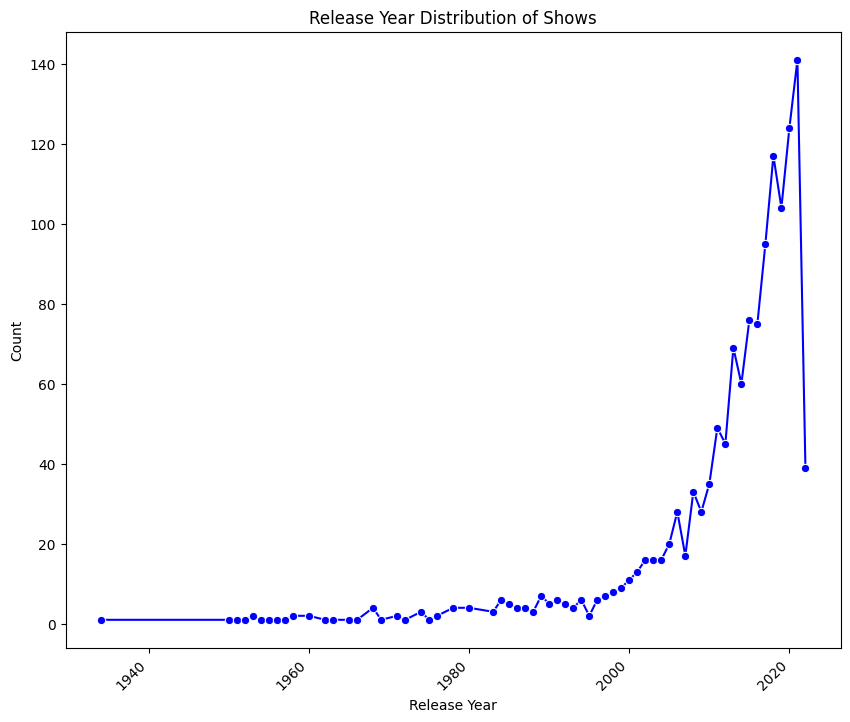

In [48]:
# Chart - 3 visualization code
# No. of shows released in each year

amazon_show = amazon_tit[amazon_tit.type=='SHOW']
am_rel_yr = amazon_show.groupby('release_year')['release_year'].count()
am_rel_yr = pd.DataFrame(am_rel_yr)
# Rename the count column
am_rel_yr.rename(columns={'release_year': 'count'}, inplace=True)
am_rel_yr.reset_index(inplace=True)
# Adjust figure size
plt.figure(figsize=(10, 8))  
sns.lineplot(data=am_rel_yr, x="release_year", y="count", marker="o", color="b")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Release Year Distribution of Shows")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To have an idea about the distribution of no. of shows released each year on Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

Before 2000, the no. of TV shows released in Prime were less, in fact less than 20. This is due to the fact that there was limited technology at that time. However, after 2000, there is a sharp increase in no. of shows. This was possible due to the advancement in technology, invention of smart phones and internet availability there enabling streaming in platforms. However in 2021, there is a sharp decrease from 140 to 60.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is one insight that talks about negative growth. The no. of shows drastically reduced from 140 to 60 in 2021. If this decreasing trend continues, this might lead to less subscription count.

#### Chart - 4

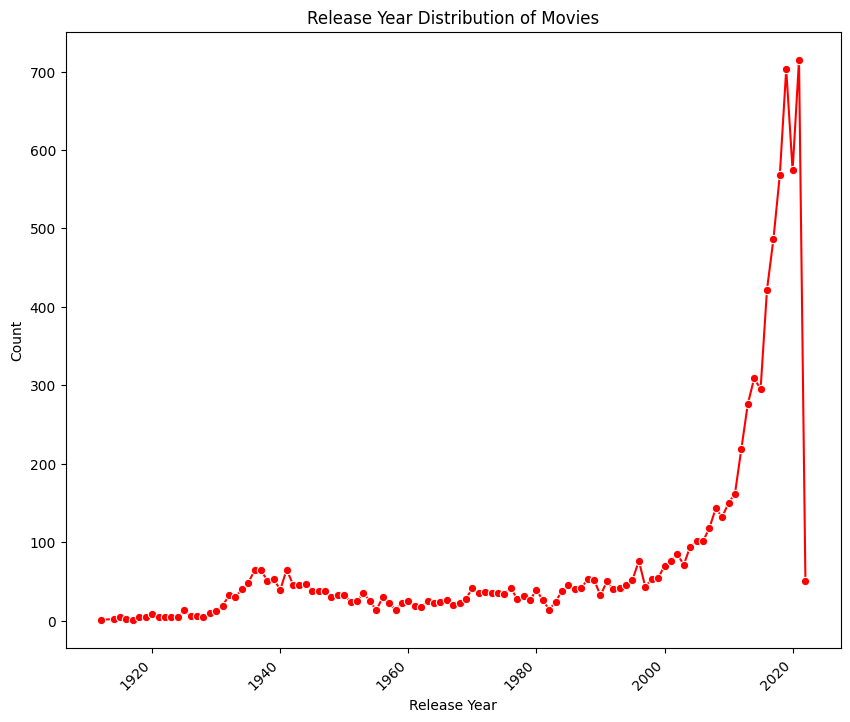

In [49]:
# Chart - 4 visualization code
# No. of movies released in each year
amazon_movies = amazon_tit[amazon_tit.type=='MOVIE']
am_rel_yr1 = amazon_movies.groupby('release_year')['release_year'].count()
am_rel_yr1 = pd.DataFrame(am_rel_yr1)
# Rename the count column
am_rel_yr1.rename(columns={'release_year': 'count'}, inplace=True)
am_rel_yr1.reset_index(inplace=True)
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.lineplot(data=am_rel_yr1, x="release_year", y="count", marker="o", color="r")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Release Year Distribution of Movies")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To have an idea about the distribution of no. of movies released each year on Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

The chart follows a similar trend as that of shows. Before 2000, there were less than 100 movies. However, after 2000, there is a steep increase from 100 to 700 in 2018 due to advancements in technology and internet availability thereby enabling streaming much easier. There is an alternate decreasing and increasing trend from 2018 to 2021. There's a steep decrease from 2020 to 2021.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The sharp decrease from 2020 to 2021 signifies a negative growth. If this continues, the subscription count would reduce drastically.

#### Chart - 5

In [50]:
# Chart - 5 visualization code
# Scatter plot runtime vs seasons (for shows)
amazon_show1 = amazon_title[amazon_title.type=='SHOW']
amazon_show2 = amazon_show1.drop(['genres','production_countries'],axis=1)
amazon_show2.duplicated().sum()

0

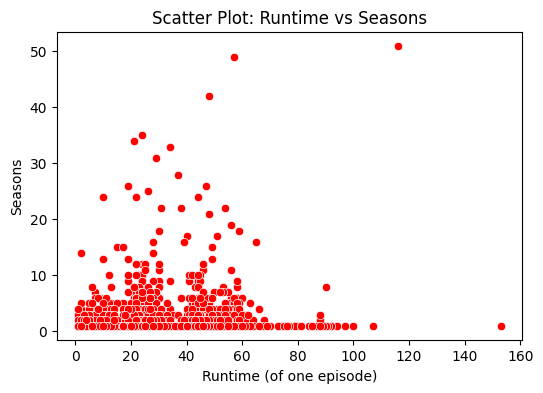

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='runtime',y='seasons',data=amazon_show2,color='r')
plt.xlabel('Runtime (of one episode)')
plt.ylabel('Seasons')
plt.title('Scatter Plot: Runtime vs Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is used to compare two numerical features. This is used to compare the relationship between runtime and seasons.

##### 2. What is/are the insight(s) found from the chart?

The points are more clustered for Seasons 0-10, where the runtime is between 0 and 100. This suggests that most of the shows present here have less than 10 seasons. There are some shows whose seasons are in the range of 10-50 with runtime mostly between 0 and 60. There is one show with 50 seasons with a runtime of 120 and another show with one season and a runtime of approximately 158. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. If the shows have atmost 10 seasons with each episode having an average runtime of 40 min, the chances of subscription count would be high.

#### Chart - 6

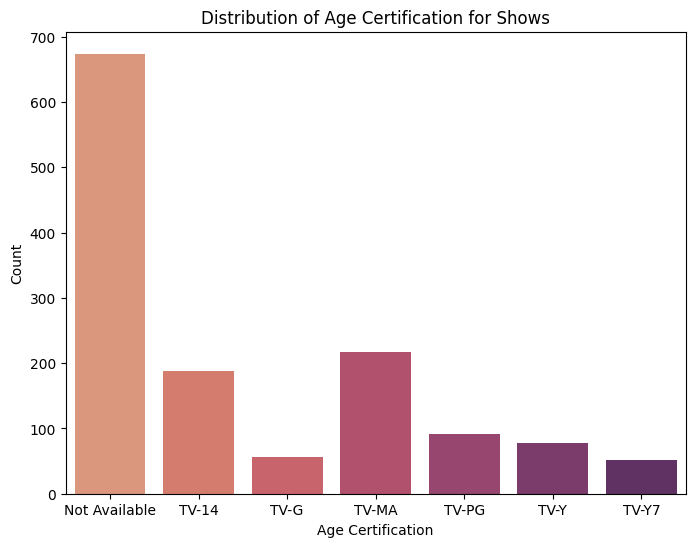

In [52]:
# Chart - 6 visualization code
# Distribution of Age certification for shows
amazon_show2 = amazon_tit[amazon_tit.type=='SHOW'].groupby('age_certification')['age_certification'].count()
amazon_show2 = pd.DataFrame(amazon_show2)
# Rename the count column
amazon_show2.rename(columns={'age_certification': 'count'}, inplace=True)
amazon_show2.reset_index(inplace=True)
# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(data=amazon_show2, x="age_certification", y="count", hue="age_certification", palette="flare", legend=False)

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45, ha="right")  
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.title("Distribution of Age Certification for Shows")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To understand the age certification distribution for shows.

##### 2. What is/are the insight(s) found from the chart?

For most of the shows, age certification isn't available. Considering the ones that are available, majority of the shows fall in TV-MA category. The second highest is TV-14. Rest are quite less with TV-Y7 and TV-14 being the least. A decreasing trend is observed from TV-PG to TV-Y7.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No insights can be given related to business impact as majority of age certification isn't available.

#### Chart - 7

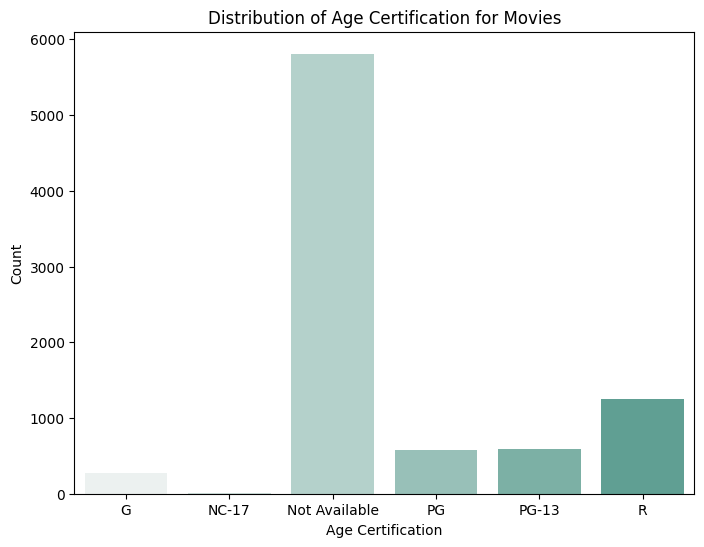

In [53]:
# Chart - 7 visualization code
# Distribution of Age certification for movie
amazon_movies2 = amazon_tit[amazon_tit.type=='MOVIE'].groupby('age_certification')['age_certification'].count()
amazon_movies2 = pd.DataFrame(amazon_movies2)
# Rename the count column
amazon_movies2.rename(columns={'age_certification': 'count'}, inplace=True)
amazon_movies2.reset_index(inplace=True)
# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(data=amazon_movies2, x="age_certification", y="count", hue="age_certification", palette="light:#5A9", legend=False)

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45, ha="right")  
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.title("Distribution of Age Certification for Movies")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To understand the distribution of age certification for movies.

##### 2. What is/are the insight(s) found from the chart?

For majority of movies, the age certification isn't available. Out of the ones that are available, R category is the highest and NC-17 is the least. There are equal number of movies belonging to PG and PG-13 category and very less movies in G category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As majority of age certification isn't available, the given insights can't tell anything about business impact.

#### Chart - 8

In [54]:
# Chart - 8 visualization code
amazon_prod = amazon_title_up.drop('genres',axis=1)
amazon_prod.duplicated().sum()

14750

In [55]:
amazon_prod.drop_duplicates(inplace=True)

In [56]:
amazon_prod.duplicated().sum()

0

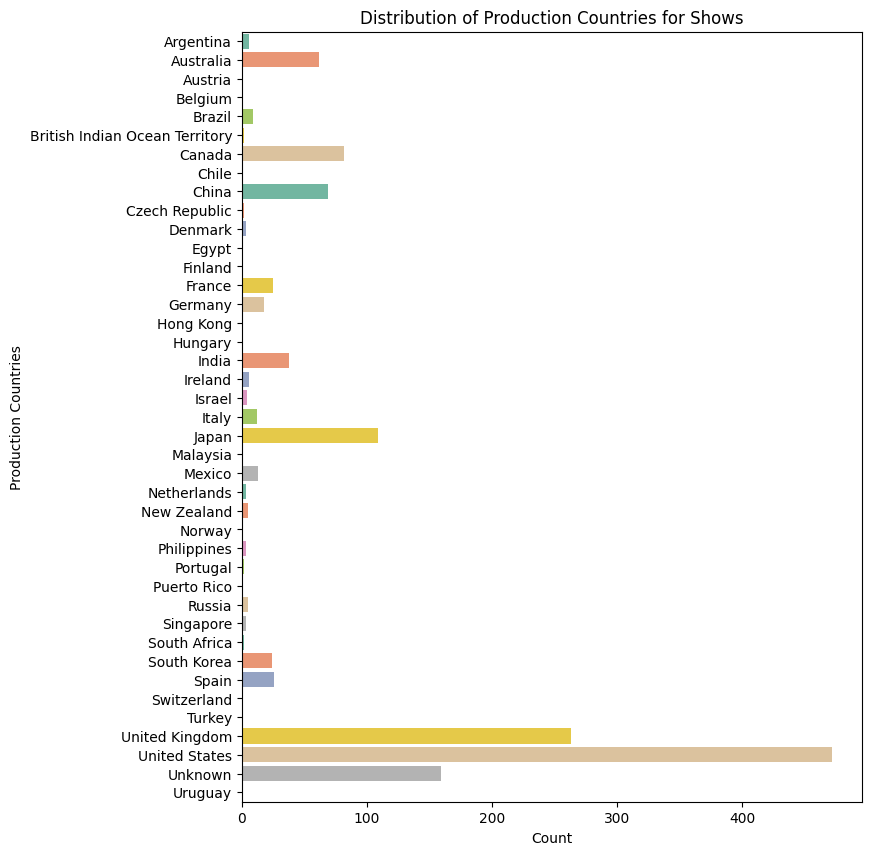

In [66]:
# Distribution of production countries for shows
amazon_shows3 = amazon_prod[amazon_prod.type=='SHOW'].groupby('production_countries')['production_countries'].count()
amazon_shows3 = pd.DataFrame(amazon_shows3)
amazon_shows3.rename(columns={'production_countries':'count'},inplace=True)
amazon_shows3.reset_index(inplace=True)
# Create a bar plot
plt.figure(figsize=(8, 10))  # Adjust figure size
sns.barplot(data=amazon_shows3, x="count", y="production_countries", hue="production_countries", palette="Set2", legend=False)

# Rotate x-axis labels for better readability 
plt.ylabel("Production Countries")
plt.xlabel("Count")
plt.title("Distribution of Production Countries for Shows")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To analyse the distribution of production countries for shows.

##### 2. What is/are the insight(s) found from the chart?

United States have produced the highest number of shows on Amazon Prime. United Kingdom has also produced nearly 260 shows which is the second highest. For nearly 160 shows, the production country is unknown. Japan has produced more than 100 shows on Amazon Prime. Australia, Canada and China have produced a fairly good number of shows. Rest of the countries have produced have produced less number of shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In countries where people prefer English shows, the chances of subscription count is high because more number of shows are produced from USA and UK.

#### Chart - 9

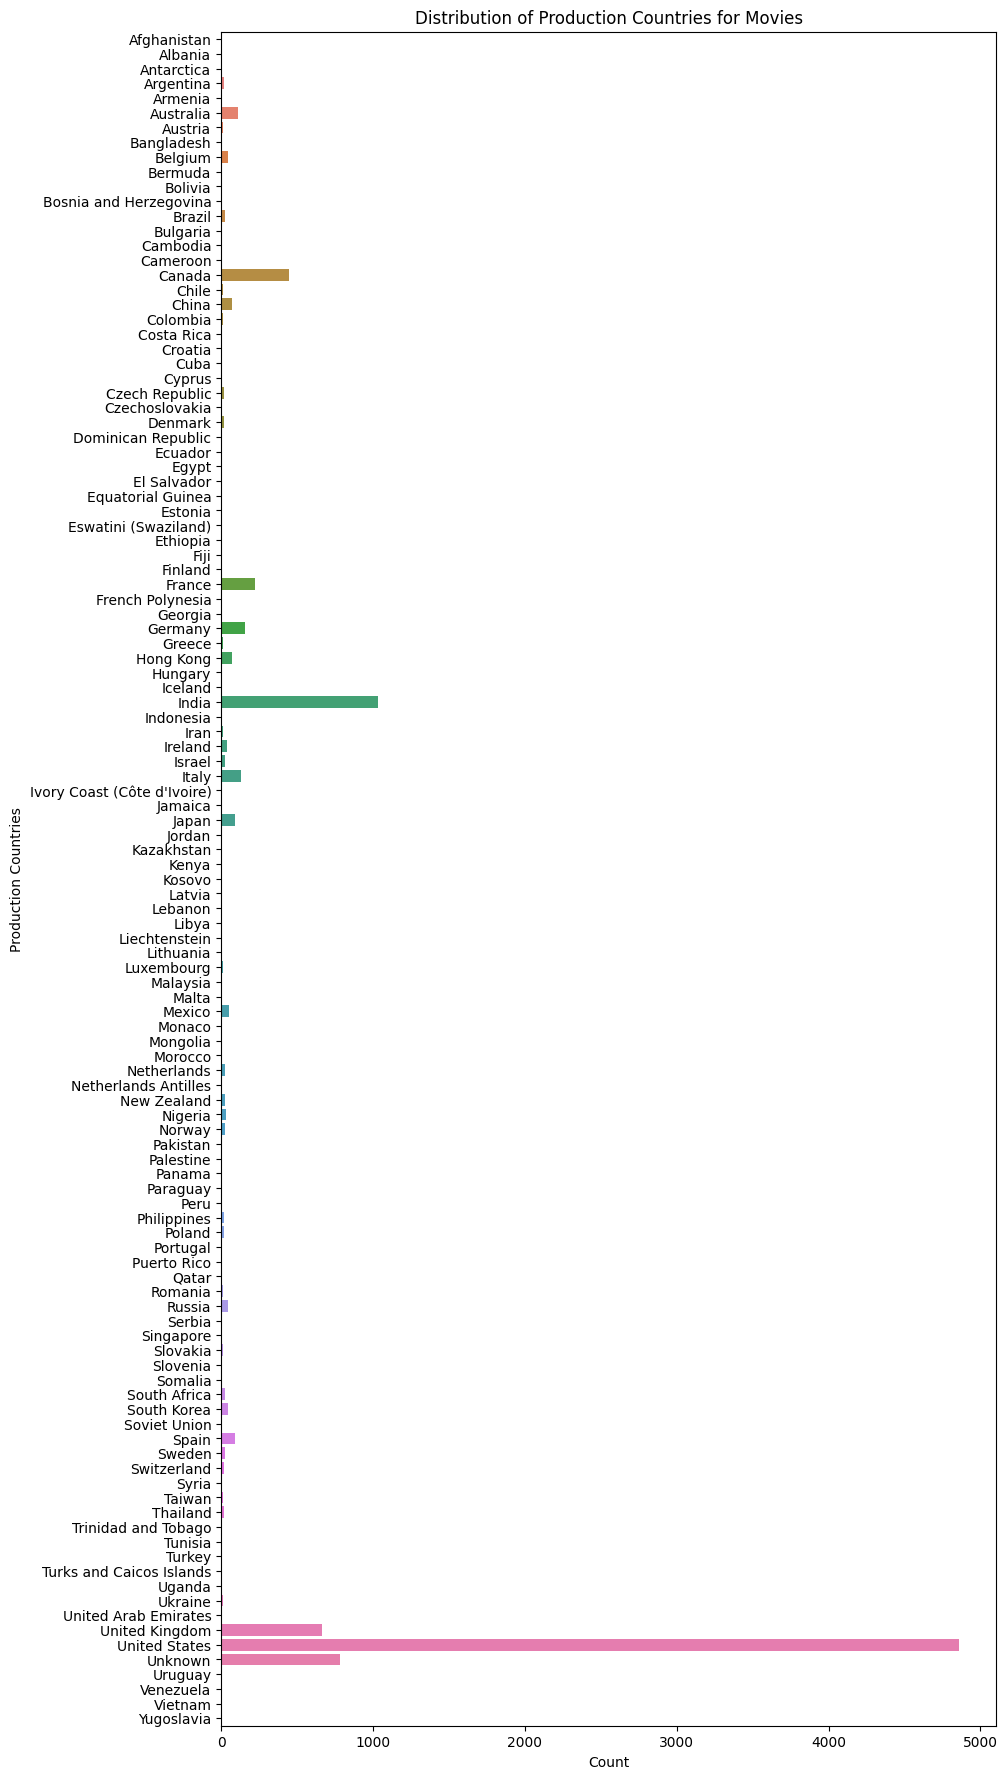

In [99]:
# Chart - 9 visualization code
# Distribution of production countries for movies
amazon_movies3 = amazon_prod[amazon_prod.type=='MOVIE'].groupby('production_countries')['production_countries'].count()
amazon_movies3 = pd.DataFrame(amazon_movies3)
amazon_movies3.rename(columns={'production_countries':'count'},inplace=True)
amazon_movies3.reset_index(inplace=True)
# Create a bar plot
plt.figure(figsize=(10, 22))  # Adjust figure size
sns.barplot(data=amazon_movies3, x="count", y="production_countries", hue="production_countries", palette="husl", legend=False)

# Rotate x-axis labels for better readability 
plt.ylabel("Production Countries")
plt.xlabel("Count")
plt.title("Distribution of Production Countries for Movies")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To analyse the distribution of production countries for movies.

##### 2. What is/are the insight(s) found from the chart?

Majority of the movies are produced by the United States. However, the second highest is India and not UK unlike for shows. For nearly 800 movies, the production countries are unknown. Canada, France and UK have produced a fairly good number of movies. Rest of the countries have produced produced less number of movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As majority of movies are produced by the United States, Amazon Prime would preferably attract an audience that prefers English movies. As this audience is quite high, the subscription count is high. Also, Bollywood and the South Indian film industy produce quite a large number of films, targeting a greater number of Indian audiences living in India and overseas. So, the chances of Indians subscribing are high. However, negative growth can be expected in other countries as the movies produced are very less and chances of subscription are less. 

#### Chart - 10

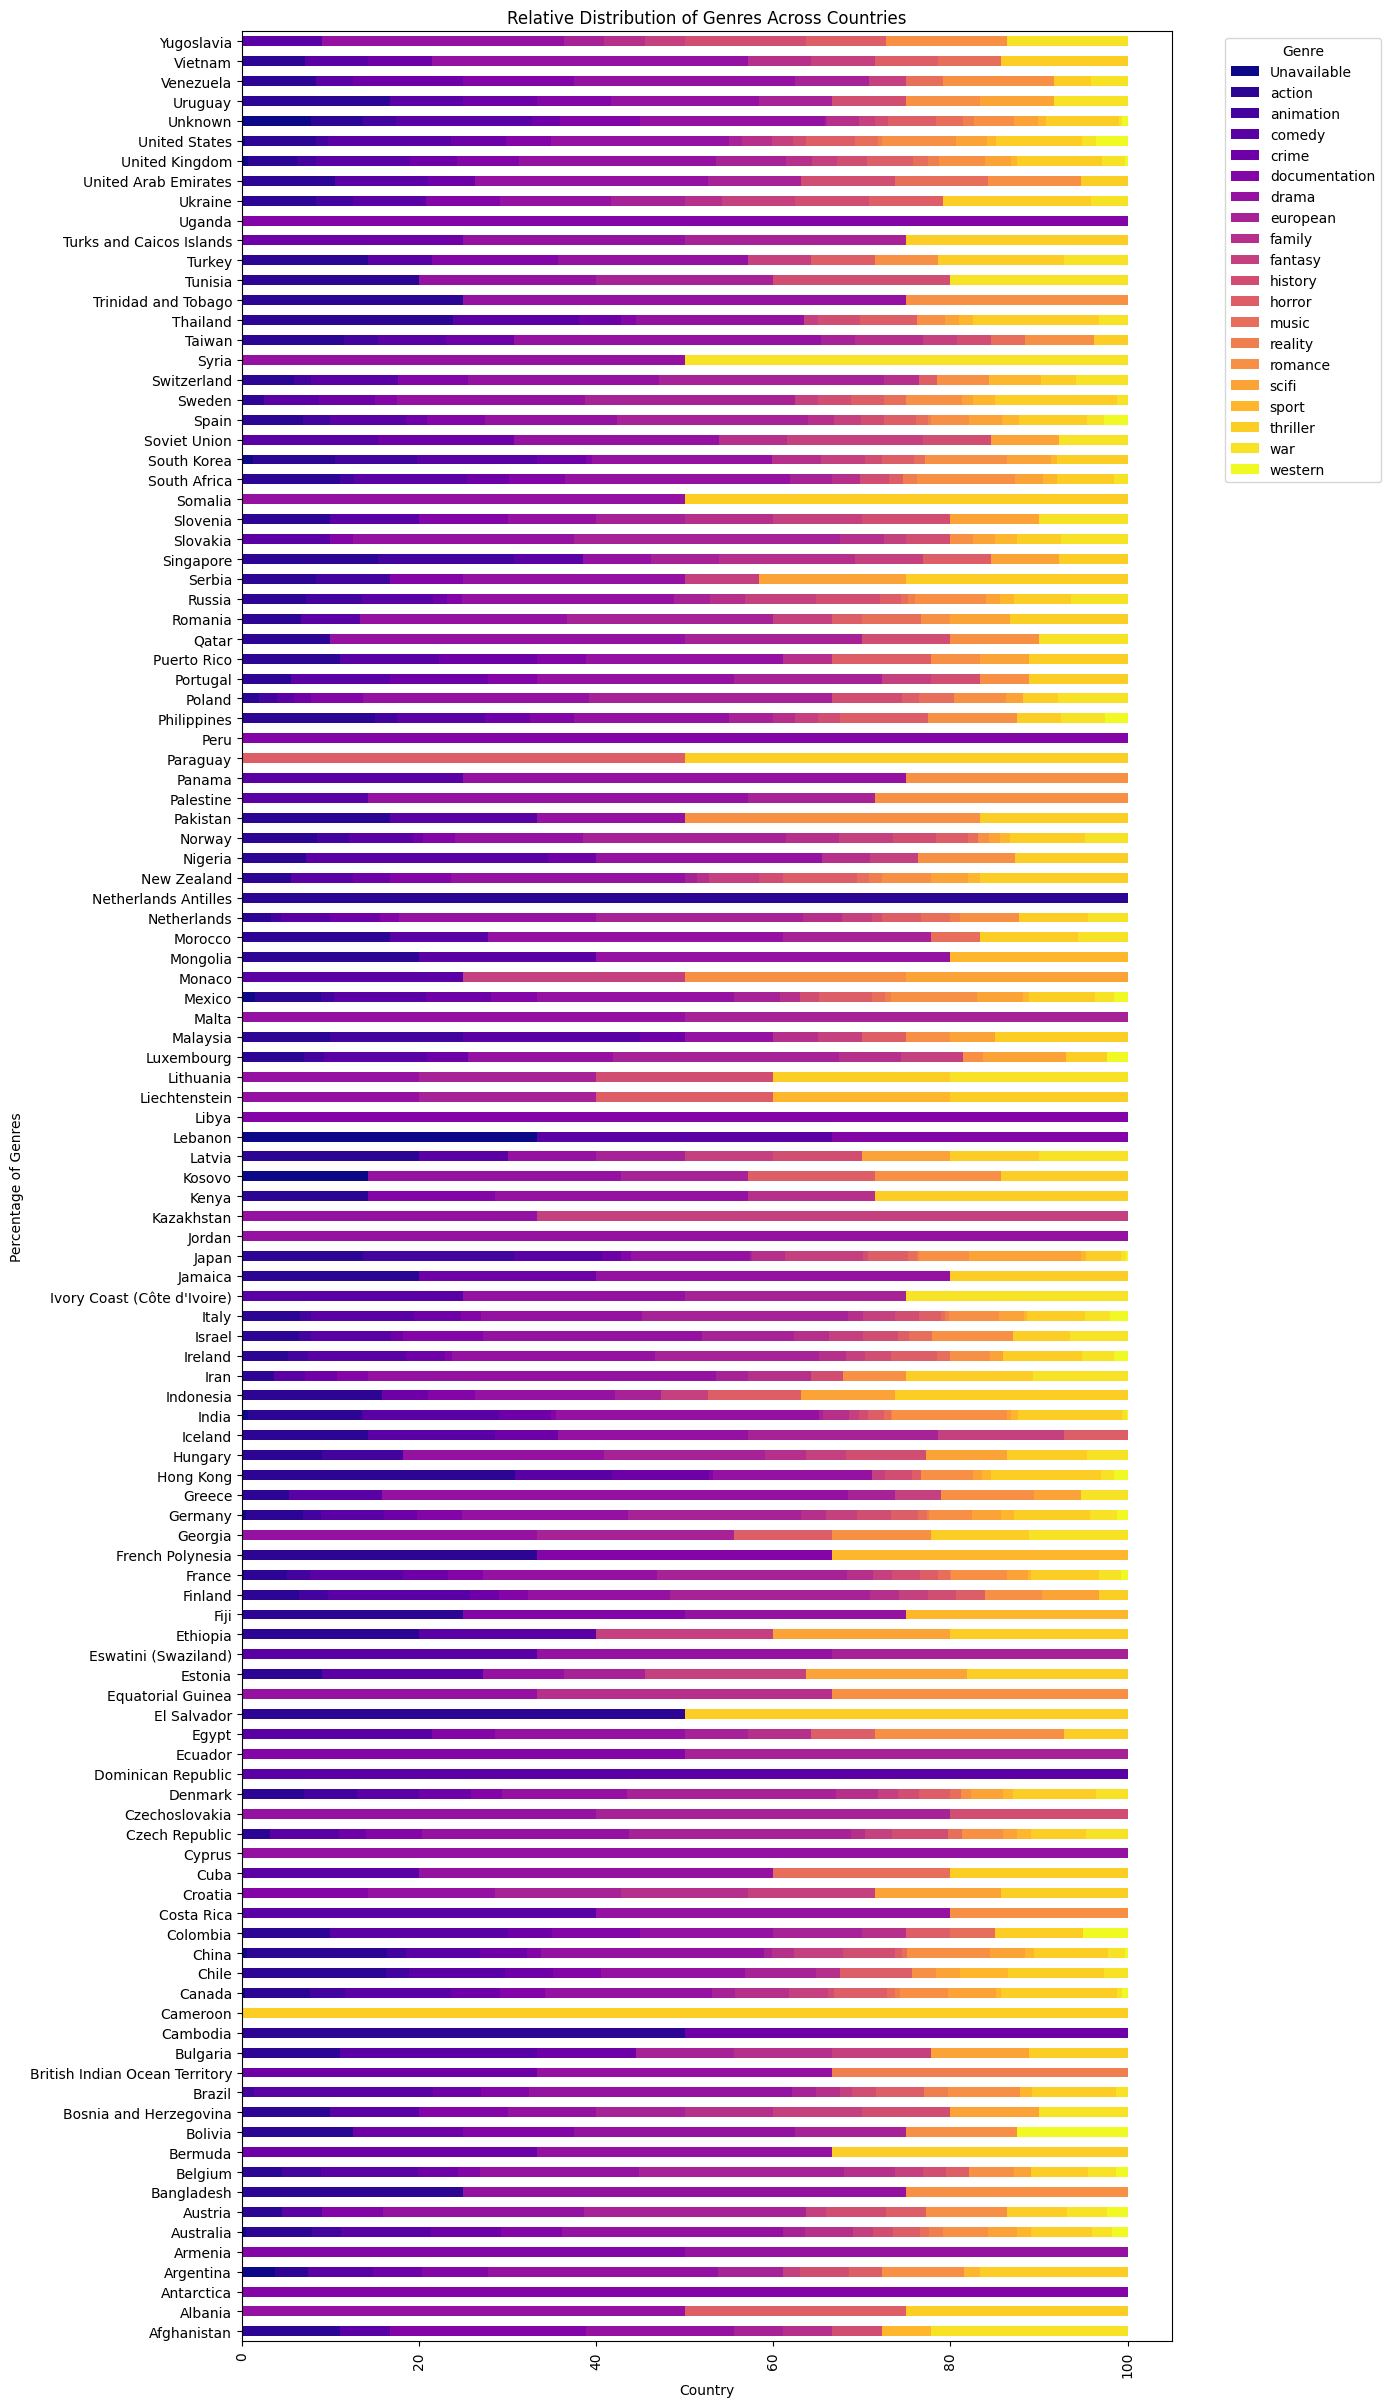

In [112]:
# Chart - 10 visualization code
# Convert groupby Series to DataFrame and reset index
df_counts = amazon_title_up.groupby(["production_countries", "genres"]).size().unstack(fill_value=0)
df_relative = df_counts.div(df_counts.sum(axis=1), axis=0) * 100
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 30))
df_relative.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)

# Labels and title
plt.xlabel("Country")
plt.ylabel("Percentage of Genres")
plt.title("Relative Distribution of Genres Across Countries")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=90)  # Rotate country names for readability

plt.show()

##### 1. Why did you pick the specific chart?

Relative stacked bar plot is useful in under relative distribution of genres across countries.

##### 2. What is/are the insight(s) found from the chart?

Most of the countries have a fair distribution across different genres which means there is a diverse production of films and shows and there are more audiences who prefer diverse genres and also resources for producing multiple films or shows in a year.
However, if we observe in countries like Cameroon, Cambodia, Antartica, Armenia, Peru, Paraguay, Uganda, Syria, Jordan, Cyprus, Dominican Republic and Kazakastan, there is no fair distribution of all genres. There are only like 1 or 2 genres in each bar. This means that in these countries films or shows produced are quite less and either there aren't much people who prefer movies/shows or they prefer other streaming platforms over Amazon Prime.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chances of subscription count is high mostly in countries where there is a production of diverse genres, thereby leading to a positive impact in business. 

#### Chart - 11

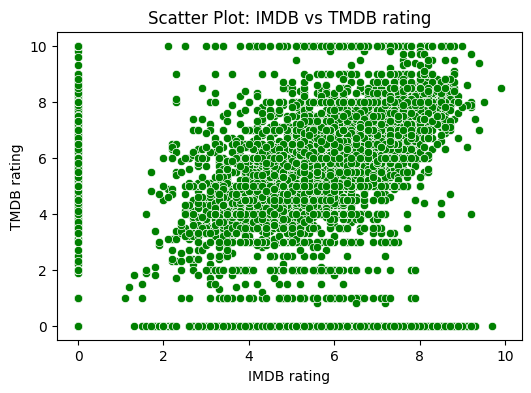

In [120]:
# Chart - 11 visualization code
# scatterplot imdb_score vs tmdb_score
plt.figure(figsize=(6,4))
sns.scatterplot(x='imdb_score',y='tmdb_score',data=amazon_tit,color='g')
plt.xlabel('IMDB rating')
plt.ylabel('TMDB rating')
plt.title('Scatter Plot: IMDB vs TMDB rating')
plt.show()

##### 1. Why did you pick the specific chart?

To compare IMDB rating and TMDB rating given for the corresponding shows and movies. Scatter plot is used to compare two numerical features.

##### 2. What is/are the insight(s) found from the chart?

A positive correlation is observed from the chart. However there are some datapoints for which IMDB is 0 but TMDB is from 0 to 10 and vice versa. This is because, some of the null values have been replaced with zero.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Including shows and movies that have high IMDB or TMDB rating increases the chances of subscription.

#### Chart - 12

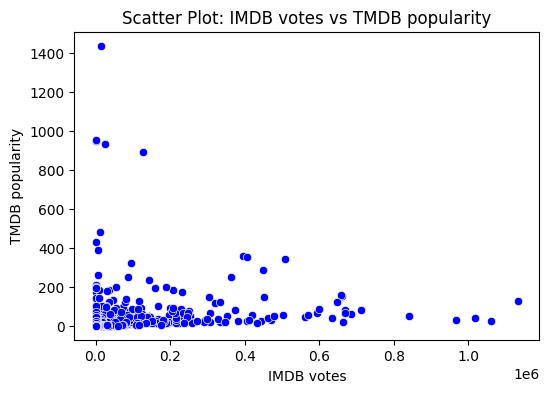

In [122]:
# Chart - 12 visualization code
# scatter plot of imdb_votes and tmdb_popularity
plt.figure(figsize=(6,4))
sns.scatterplot(x='imdb_votes',y='tmdb_popularity',data=amazon_tit,color='b')
plt.xlabel('IMDB votes')
plt.ylabel('TMDB popularity')
plt.title('Scatter Plot: IMDB votes vs TMDB popularity')
plt.show()

##### 1. Why did you pick the specific chart?

To compare the relationship between IMDB votes and TMDB popularity.

##### 2. What is/are the insight(s) found from the chart?

There are more points clustered where IMDB votes lie between (0-0.4)x1e6 and TMDB popularity lying between 0 and 200. Also, for most of the points, TMDB popularity lies between 0 and 200. There are 3 points for which IMDB is less and TMDB is quite high.
This suggests that TMDB popularity is less and around 200 for most of the movies and shows even though IMDB votes are high for some shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights provided here suggest that if people go by IMDB votes, then there would be more subscription count. On the other hand, negative growth may be seen if they go by the TMDB popularity reducing the subscription count and renewal. 

#### Chart - 13

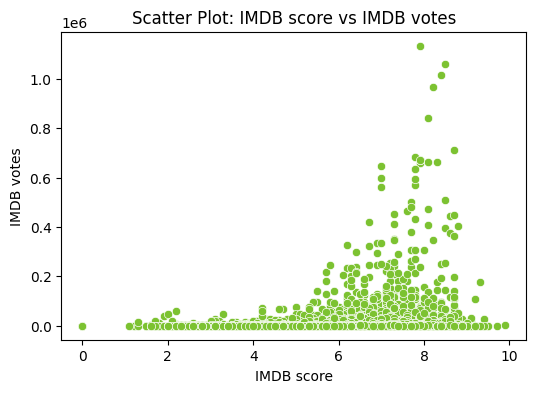

In [128]:
# Chart - 13 visualization code
# scatter plot of imdb_score and imdb_votes
plt.figure(figsize=(6,4))
sns.scatterplot(x='imdb_score',y='imdb_votes',data=amazon_tit,color='#7CC231')
plt.xlabel('IMDB score')
plt.ylabel('IMDB votes')
plt.title('Scatter Plot: IMDB score vs IMDB votes')
plt.show()

##### 1. Why did you pick the specific chart?

To make a comparison between IMDB score and IMDB votes.

##### 2. What is/are the insight(s) found from the chart?

The points are clustered in the regions where IMDB votes are in the range of 0-400000. For some movies where the IMDB score is between 6 and 8, the IMDB votes are quite high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People usually prefer shows and movies with high ratings (preferably from 7 to 10). As there are many shows and movies in this range with IMDB votes quite high, this would increase the subscription count.

#### Chart - 14 - Correlation Heatmap

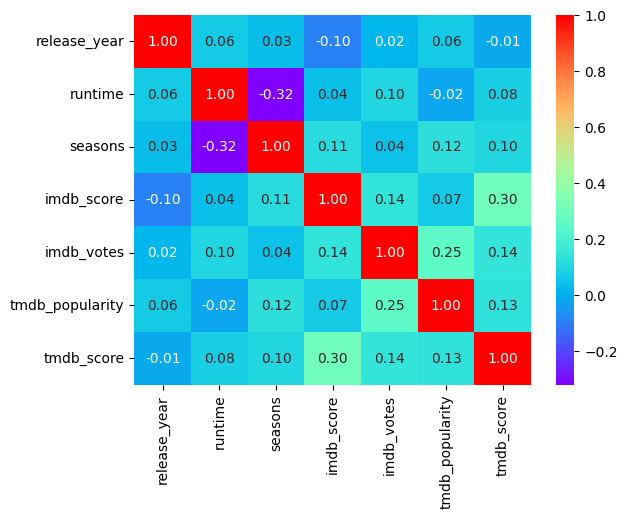

In [131]:
# Correlation Heatmap visualization code
amazon_tit_num = amazon_tit.select_dtypes(include='number')
corr_mat = amazon_tit_num.corr()
sns.heatmap(corr_mat,annot=True,cmap="rainbow", fmt=".2f")
plt.show()

##### 1. Why did you pick the specific chart?

Correlation matrix is used to compare numerical features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

There is quite stronger negative correlation between runtime and seasons. There is a stronger positive correlation between imdb_score and tmdb_score, and likewise imdb_votes and tmdb_popularity.

#### Chart - 15 - Pair Plot

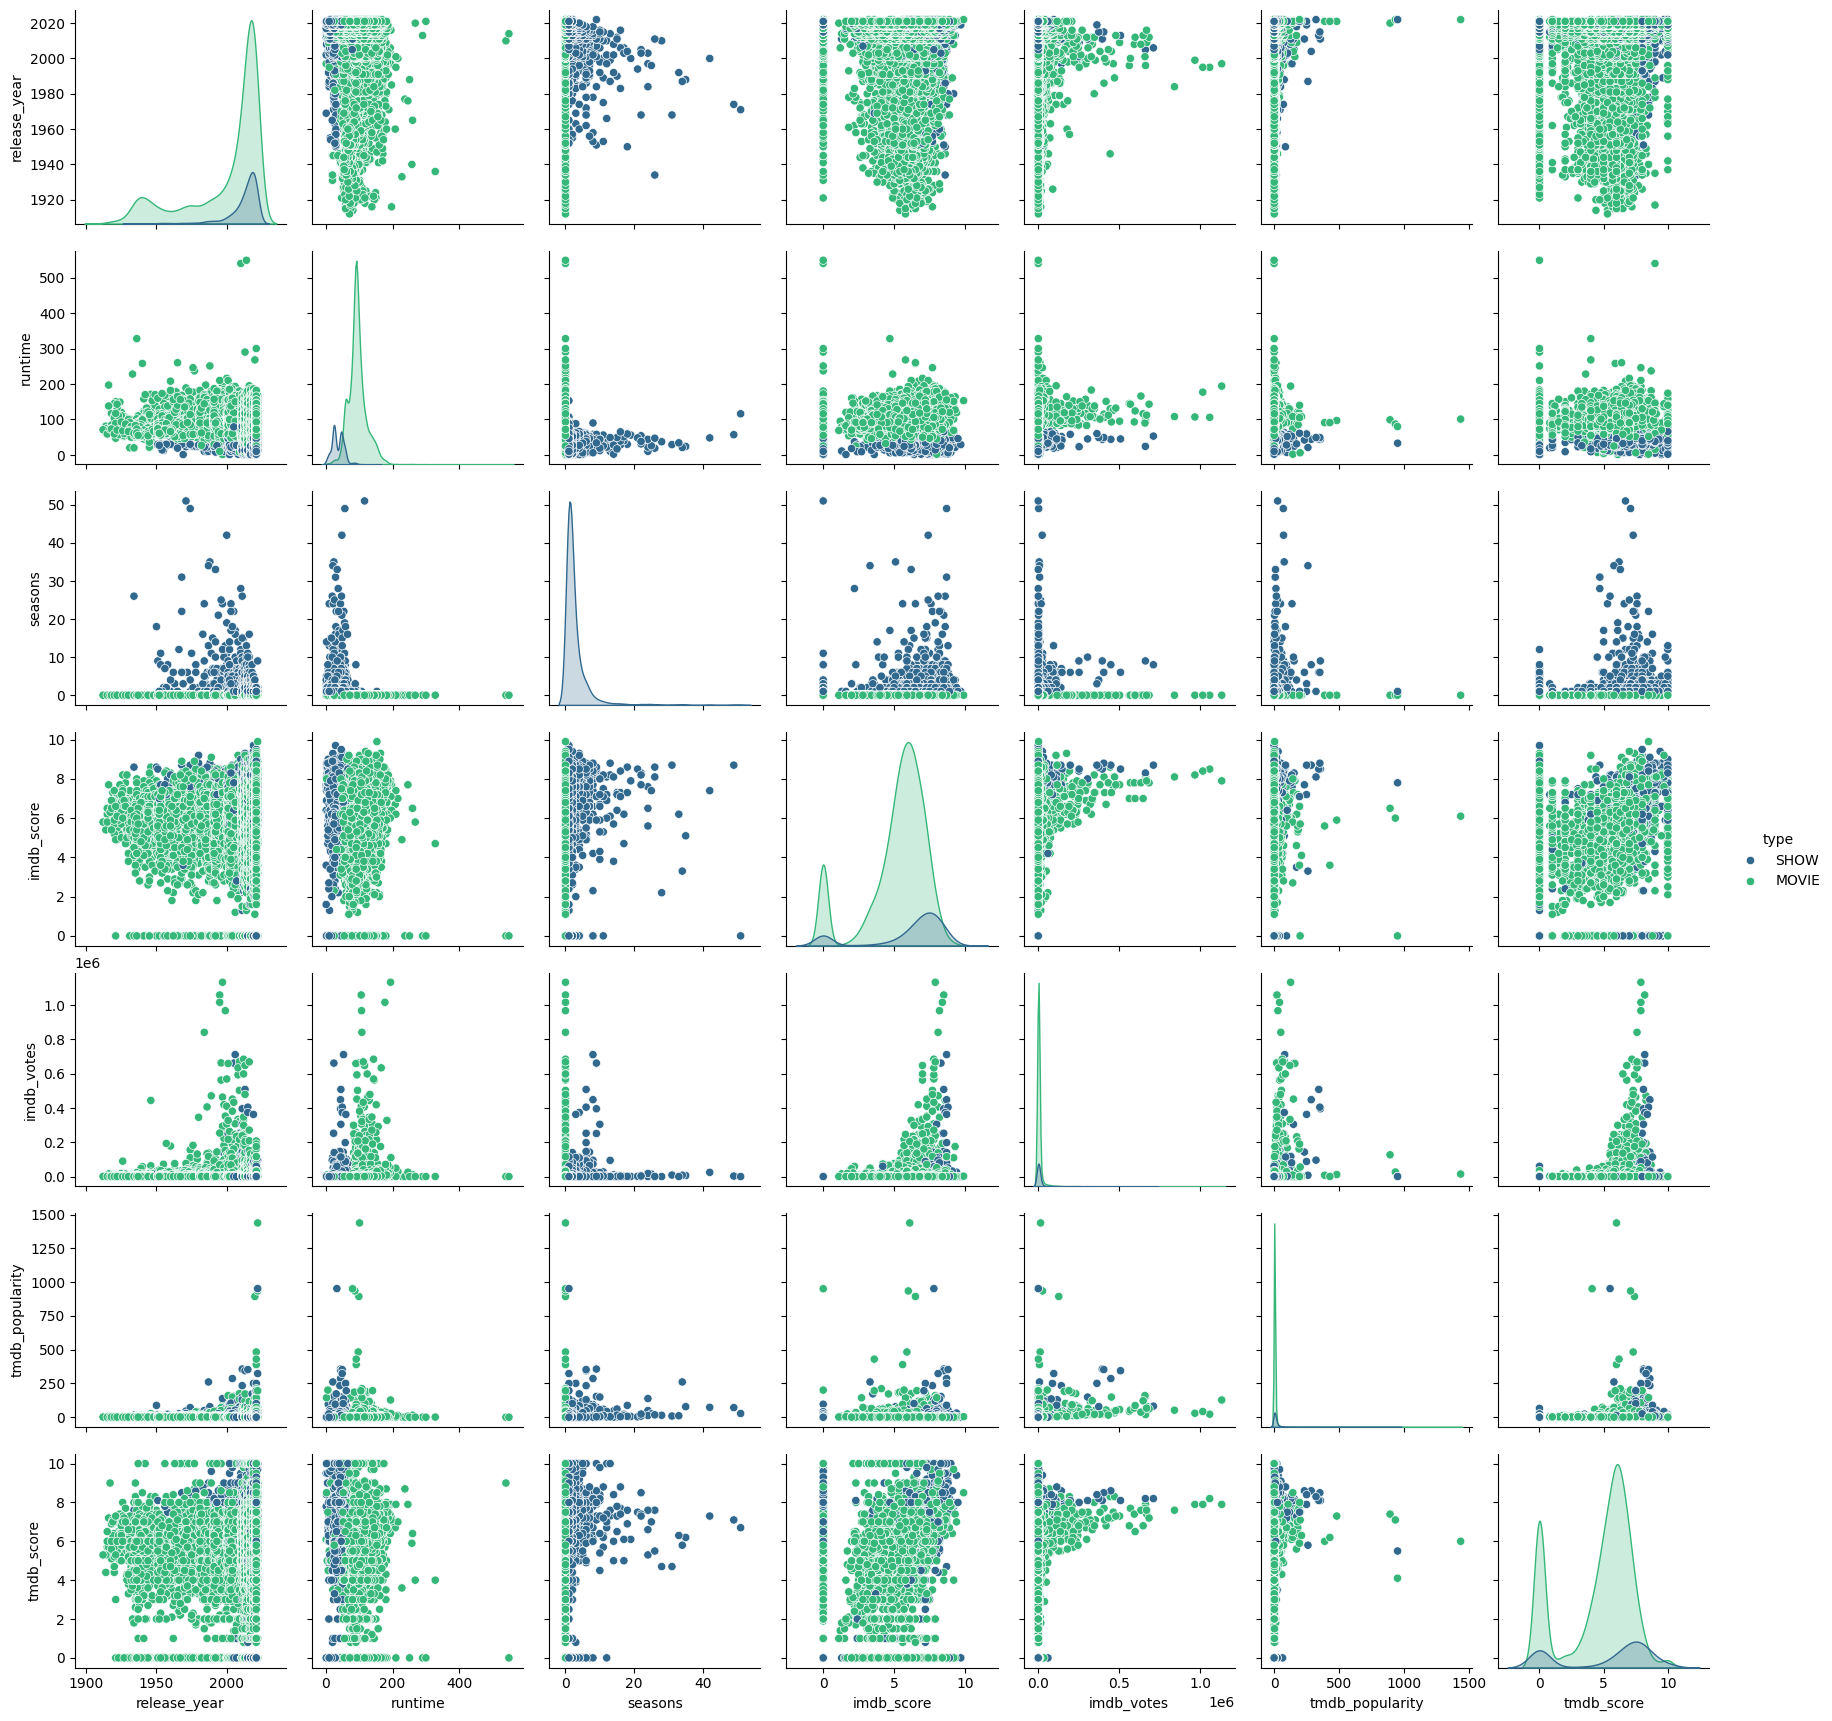

In [133]:
# Pair Plot visualization code
amazon_tit_num = amazon_tit.select_dtypes(include='number')
amazon_type = amazon_tit[['type']]
amazon_tit_up = pd.concat([amazon_tit_num,amazon_type],axis=1)
sns.pairplot(amazon_tit_up, hue="type", palette="viridis")
plt.show()

##### 1. Why did you pick the specific chart?

To compare the numerical features based on type 'show' and 'movie'.

##### 2. What is/are the insight(s) found from the chart?

Some features could possibly have liner or non-linear relationships and random scatter between some features suggest that there is no correlation. IMDb score and TMDb score have a similar distribution as the KDE plot for both are quite similar. Runtime, seasons, IMDb votes and TMDb popularity are positively skewed. Some movies seem to dominate in votes and popularity. Some points are far from the main clusters, indicating highly popular movies/shows or exceptions in runtime/seasons. Movies might have higher IMDb votes and popularity, while shows could have wider variability in scores.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Most of the genre comprises of drama and comedy. However crime, thriller, animation, action and sci-fi shows and movies are quite less. Including more shows in this genre can actually increase the number of subscribers.
2. Including shows with lesser runtime for each episode can cater a huge audience.
3. Based on the data presented in the relative stacked bar plot, once can tailor user based preferences to include more shows and movies in the preferred genre.
4. Including shows and films with higher IMDB and TMDB rating would bring in more subscribers.

# **Conclusion**

Most of the shows and movies that are present on Amazon Prime belong to drama and comedy genre. Majority of the movies and shows are produced by the United States. Most of the shows present have less than or equal to 10 seasons with the runtime of each episode being on an average of 40 minutes. There is a fair distribution of genres for most of the countries. IMDb and TMDb scores are positively correlated. This means that if a movie / show has a high IMDb rating, then it will also have a high TMDb rating. 